In [1]:
#Importing the required Libraries

import pandas as pd   
#Import Pandas to deal with DataFrames 

import numpy as np      
#Import Numpy to deal with mathematical Data

import seaborn as sns   

#import Seaborn to creat charts of Data

import matplotlib.pyplot as plt
%matplotlib inline     
#So that charts appear under lines

In [2]:
df = pd.read_csv('Predict Price of Airline Tickets.csv') #to read csv file by pandas library 

In [3]:
df.head(10) #to get some first rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU ? BLR,9:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/3/2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,10:25,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,1/3/2019,Banglore,New Delhi,BLR ? BOM ? DEL,8:00,5:05,21h 5m,1 stop,No info,22270
8,Jet Airways,12/3/2019,Banglore,New Delhi,BLR ? BOM ? DEL,8:55,10:25,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
df.columns  #to show all columns in data frame 

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isna().sum() #to get the sum of all null cells for every column

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)  #to drop or delete the null celss

In [8]:
df.isna().sum()  #to get the sum of all null cells for every column

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.describe().T #DESCRIBE THE DATA FRAME TO GET COUNT &MEAN &STD &MIN 

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.54881,1759.0,5277.0,8372.0,12373.0,79512.0


In [10]:
df.dtypes #to get data types of all columns
# datatypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
df[df.duplicated()]
# Checking if there are any Duplicate values

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/6/2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,4:25,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,19:15,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL ? HYD ? BOM ? COK,17:15,19:15,26h,2 stops,No info,12392
1418,Jet Airways,6/6/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,5:30,4:25,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,12:35,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/6/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,9:40,12:35,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/6/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,9:40,12:35,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,19:00,19h 55m,2 stops,In-flight meal not included,11150


In [12]:
# Drop duplicates value
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df["Additional_Info"].value_counts()

No info                         8180
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [14]:
df['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)
#concatonate no info and  Info

In [15]:
df["Additional_Info"].value_counts()

No Info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

# Check Outlires

<AxesSubplot:xlabel='Price'>

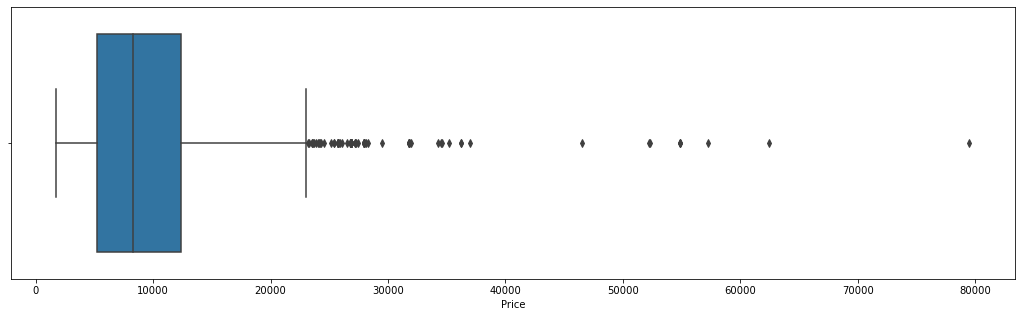

In [16]:
#to draw boxplot chart to check the outliers in the data 

plt.figure(figsize = (18,5))  #size of chart

sns.boxplot(x = 'Price', data = df)


In [17]:
# maxmum outliers = 23000 , and over this value this is outliers

<AxesSubplot:xlabel='Price', ylabel='Count'>

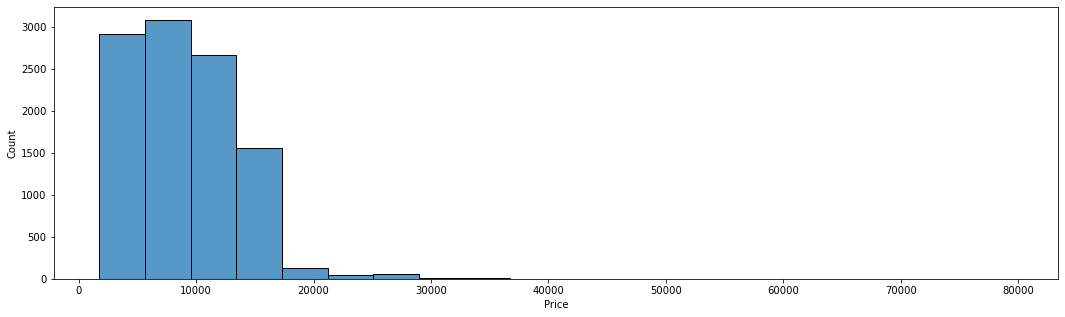

In [18]:
#to draw histogram chart of price to show the prices

plt.figure(figsize = (18,5))

sns.histplot(x = 'Price', data = df,bins=20)

In [19]:
# count of price for ticket

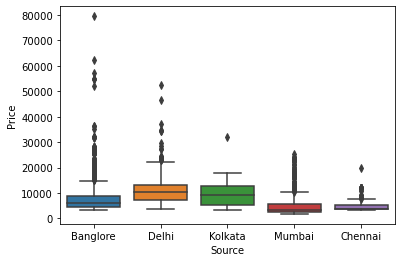

In [20]:
sns.boxplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False))
plt.show()
#relation between price and source to know all data

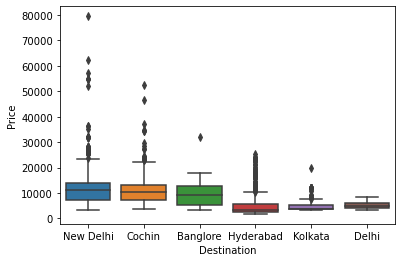

In [21]:
sns.boxplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False))
plt.show()
#relation between price and destination

Text(0, 0.5, 'Price of ticket')

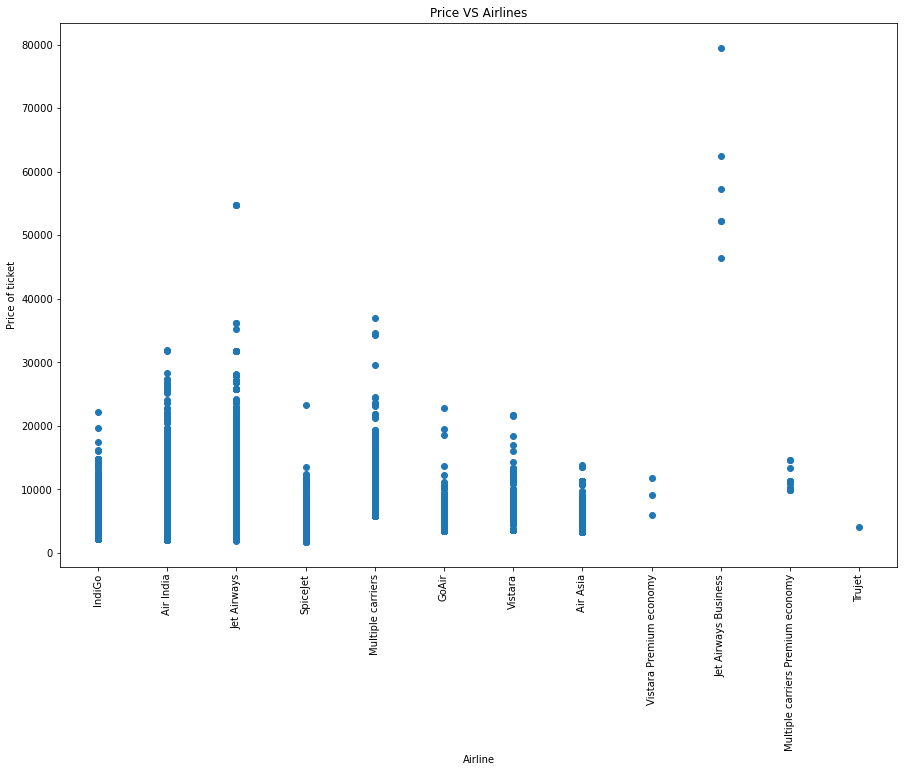

In [22]:
# size of figuer
plt.figure(figsize = (15, 10))

# graph title is Price VS Airlines
plt.title('Price VS Airlines')

# type of graph is scatter between two columns (Price , Airlines)
plt.scatter(df['Airline'], df['Price'])

# routate name of x axis to vertical
plt.xticks(rotation = 90)

# x axis for airline names
plt.xlabel('Airline')

# y axis for price of ticket 
plt.ylabel('Price of ticket')

# reltion between price and airline 

In [23]:
# output: the airline effect about price of ticket and mean all airline how much price

C:\Users\Youssef\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price of ticket')

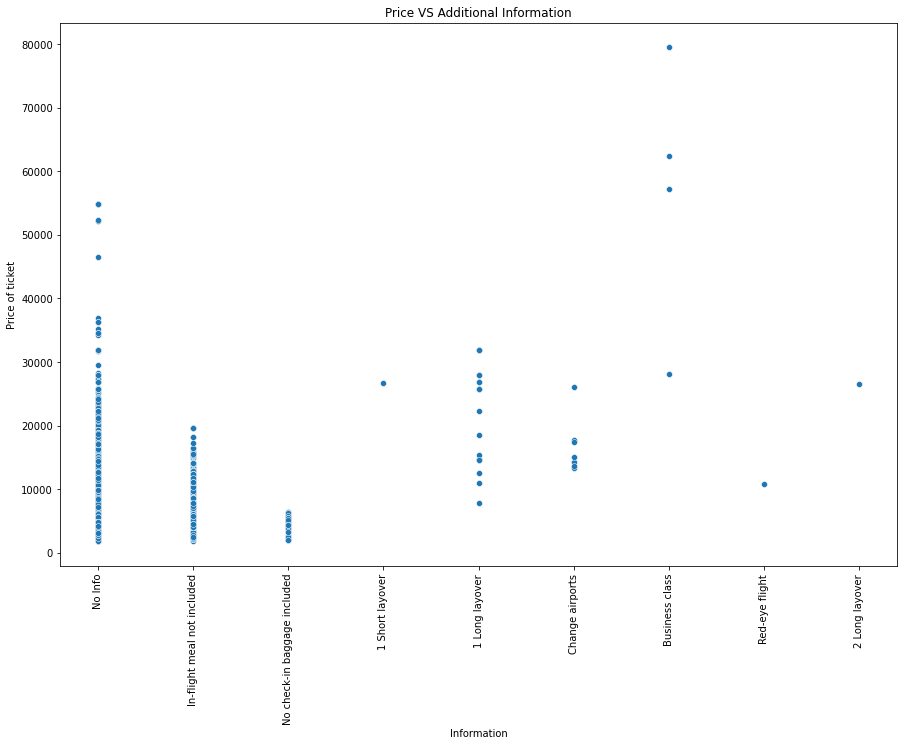

In [24]:
# size of figuer
plt.figure(figsize = (15, 10))

# graph title is Price VS Additional Information
plt.title('Price VS Additional Information')

# type of graph is scatter between two columns (Price , Additional Information)
sns.scatterplot(df['Additional_Info'], df['Price'],data=df)

# routate name of x axis to vertical
plt.xticks(rotation = 90)

# x axis for Additional Information names
plt.xlabel('Information')

# y axis for price of ticket 
plt.ylabel('Price of ticket')

# reltion between price and airline 

In [25]:
# output: the information effect about price of ticket and mean how information effect in price 

In [26]:
# to split column the journey day in table to day and mounth

df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

# to drop the column date of journey and save to excel sheet
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [27]:
# to split column the dep_time in table to hours and min

df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# to drop the column dep_time and save to excel sheet
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [28]:
# to split column the Arrival_Time in table to Arrival_hour and Arrival_min

df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# to drop the column Arrival_Time and save to excel sheet
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
df[df.duplicated()]

# know the duplicated data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min


In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No Info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No Info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No Info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No Info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No Info,13302,1,3,16,50,21,35


In [31]:
df.drop_duplicates(keep='first',inplace=True)

# drop the dublicated data and save it

In [32]:
df[df.duplicated()]

# to insure the duplicated data is droped

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min


In [33]:
df["Duration"]=df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#split the duration to hours and minute 

In [34]:
df.Duration = np.log(df.Duration)

In [35]:
Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

#convert the string data to integer data 

In [36]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

# convert the string data to integer data

In [37]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# convert the stops from string and integer

In [38]:
df['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

# replace to info = no Info

In [39]:
Add_info = df[["Additional_Info"]]
Add_info = pd.get_dummies(Add_info, drop_first = True)

#  convert the string data to integer data

In [40]:
# do concat to new columns (integer) 
df = pd.concat([df, Airline, Source, Destination,Add_info], axis = 1)

df.drop(["Airline", "Source", "Destination","Additional_Info",'Route'], axis = 1, inplace = True)

# droped the original columns

In [41]:
df

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,5.135798,0,3897,24,3,22,20,1,10,0,...,0,1,0,0,0,0,0,1,0,0
1,6.098074,2,7662,1,5,5,50,13,15,1,...,0,0,0,0,0,0,0,1,0,0
2,7.038784,2,13882,9,6,9,25,4,25,0,...,0,0,0,0,0,0,0,1,0,0
3,5.783825,1,6218,12,5,18,5,23,30,0,...,0,0,0,0,0,0,0,1,0,0
4,5.652489,1,13302,1,3,16,50,21,35,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,5.010635,0,4107,9,4,19,55,22,25,0,...,0,0,0,0,0,0,0,1,0,0
10679,5.043425,0,4145,27,4,20,45,23,20,1,...,0,0,0,0,0,0,0,1,0,0
10680,5.192957,0,7229,27,4,8,20,11,20,0,...,0,0,0,0,0,0,0,1,0,0
10681,5.075174,0,12648,1,3,11,30,14,10,0,...,0,1,0,0,0,0,0,1,0,0


In [42]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_Red-eye flight'],
      dty

# Machine model

In [43]:
# drop price column
x = df.drop('Price',axis=1)

# new column to price = y
y = df['Price']

#train-test split

from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 51)
# test size=2/10 ,and train size = 0.8, and random state=51(best value)

In [44]:
X_train
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# use LinearRegression model 

LinearRegression()

In [45]:
y_pred = regressor.predict(X_test)
y_pred

# predict y

array([ 9947.05849889, 11600.98573025,  5030.63406015, ...,
        9394.48873346,  8882.87097135,  9730.96679598])

In [46]:
regressor.score(X_train , y_train)

# presentage between x train and y train

0.6848160304507156

In [47]:
regressor.score(X_test , y_test)

# presentage between x test and y test = acuraccy

0.7227399147119276

C:\Users\Youssef\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

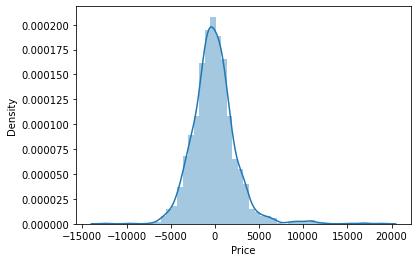

In [48]:
sns.distplot(y_test - y_pred)

# relation between test data and prediction data 

In [49]:
# output: standard normal distribution for density of price between y test and y pred

Text(0, 0.5, 'y_pred')

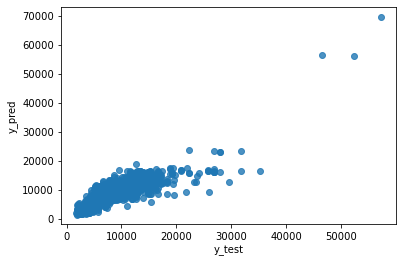

In [50]:
plt.scatter(y_test , y_pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('y_pred')

# relation between test data and prediction data by scatter

In [51]:
# output: show outlires in output 

In [52]:
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
# the rules to calculate the error

print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
# another rule to calculate error

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
# so rule to calculate error

print("r2_score:",metrics.r2_score(y_test,y_pred)) 
# the acuraccy

MSE: 6140371.345599157
MAE: 1774.2789276407943
RMSE: 2477.9772689835468
r2_score: 0.7227399147119276
